In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ========== 全局风格 ========== 
plt.rcParams.update({
    'font.family': 'Arial',  
    'axes.unicode_minus': False, 
    'font.size': 16,       # 全局字体
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 14,
})
sns.set_palette("deep") 
sns.set_style("whitegrid", {'axes.grid': False, 'ytick.left': True, 'xtick.bottom': True})

# 示例颜色
colors = ["#74AED4", "#F7C97E", "#ECA8A9", "#C6CF9D"]

def plot_ganon_comparison(ax, metrics_ganonFMC, metrics_ganon):
    """
    A) 绘图函数示例：比较 ganon vs ganonFMC 4指标柱状图
    metrics_ganonFMC, metrics_ganon 均是 dict，如:
      {
        "Accuracy": 0.80,
        "Precision":0.75,
        "Recall":   0.78,
        "F1 Score": 0.76
      }
    """

    metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
    models  = ["ganonFMC", "ganon"]
    
    bar_width = 0.2
    x = np.arange(len(models))  # x轴索引: 0,1

    for i, metric in enumerate(metrics):
        # 两个值: [ganonFMC的这个metric, ganon的这个metric]
        vals = [metrics_ganonFMC[metric], metrics_ganon[metric]]
        
        # 偏移量
        x_offset = (i - 1.5)*bar_width
        bars = ax.bar(
            x + x_offset,
            vals,
            width=bar_width,
            label=metric,
            color=colors[i],
            alpha=0.85,
            edgecolor="#555555"
        )
        # 顶端文字
        for bar in bars:
            h = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2,
                h + 0.01, 
                f"{h:.2f}",
                ha='center', va='bottom',
                fontsize=1, fontweight="bold"
            )
    
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_ylim(0, 1.05)
    # 去掉多余边框
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # 图例
    # ax.legend(loc="upper left")
    # ax.set_title("A) Ganon vs GanonFMC Comparison", fontsize=18)

def plot_refseq_comparison(ax, metrics_folder1, metrics_folder2):
    """
    B) 绘图函数示例：比较 refseq_200w vs refseq_400w 4指标
    metrics_folder1, metrics_folder2 也是 dict
    """
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
    models  = ["RefSeq_200w", "RefSeq_400w"]
    bar_width = 0.2
    x = np.arange(len(models))

    for i, metric in enumerate(metrics):
        vals = [metrics_folder1[metric], metrics_folder2[metric]]
        x_offset = (i - 1.5)*bar_width
        bars = ax.bar(
            x + x_offset,
            vals,
            width=bar_width,
            label=metric,
            color=colors[i],
            alpha=0.85,
            edgecolor="#555555"
        )
        # 顶端数值
        for bar in bars:
            h = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2,
                h + 0.01, 
                f"{h:.2f}",
                ha='center', va='bottom',
                fontsize=14, fontweight="bold"
            )
    
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_ylim(0, 1.05)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # ax.legend(loc="upper left")
    # ax.set_title("B) Refseq 200w vs 400w Comparison", fontsize=18)

def plot_FMC_bar_chart(ax, categories, metrics, values):
    """
    C) 绘图函数示例：比如你说的 "2×10^5" vs "No Limit" 的 4 指标。
    categories: ["2×10^5", "No Limit"]
    metrics: ["Accuracy", "Precision", "Recall", "F1 Score"]
    values: shape=(4,2)，第一行是 Accuracy 两个值，第二行是 Precision 两个值，等等。
    """
    # categories on x-axis
    x = np.arange(len(categories))  # 0,1
    bar_width = 0.2

    for i, metric in enumerate(metrics):
        # 第 i 行 => 该 metric 对应的 2 个值
        metric_vals = values[i]
        
        x_offset = (i - 1.5)*bar_width
        bars = ax.bar(
            x + x_offset,
            metric_vals,
            width=bar_width,
            label=metric,
            color=colors[i],
            alpha=0.5,
            edgecolor="#555555"
        )
        # 顶端数值
        for bar in bars:
            h = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2,
                h,
                f"{h:.2f}",
                ha='center', va='bottom',
                fontsize=14, fontweight="bold"
            )

    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    # ax.set_ylim(0, 1.05)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # ax.legend(loc="upper left")
    # ax.set_title("C) 2×10^5 vs No Limit (Example)", fontsize=18)


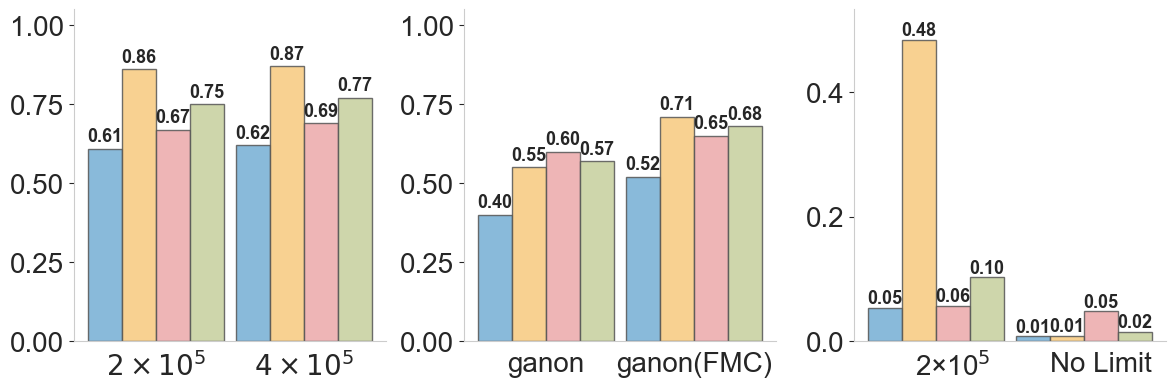

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

##############################################################################
# 1) 全局风格 & 示例数据（请根据实际需要自行替换/修改）
##############################################################################

# 调大字体
mpl.rcParams.update({
    'font.family': 'Arial',
    'font.size': 22,          # 基础字体大小
    'axes.labelsize': 26,     # 坐标轴标签字体
    'xtick.labelsize': 20,    # X 轴刻度字体
    'ytick.labelsize': 20,    # Y 轴刻度字体
})

# 去掉 seaborn 的网格，仅保留左侧坐标轴
sns.set_style("whitegrid", {'axes.grid': False, 'ytick.left': True})

# 颜色方案（统一让三张图使用）
colors = ["#74AED4", "#F7C97E", "#ECA8A9", "#C6CF9D"]

# ---------- 示例数据 1：Refseq Comparison ----------
metrics_folder1 = {"Accuracy": 0.61, "Precision": 0.86, "Recall": 0.67, "F1 Score": 0.75}
metrics_folder2 = {"Accuracy": 0.62, "Precision": 0.87, "Recall": 0.69, "F1 Score": 0.77}

# ---------- 示例数据 2：ganonComparisonFMC ----------
ganon_metrics1 = {"Accuracy": 0.40, "Precision": 0.55, "Recall": 0.60, "F1 Score": 0.57}
ganon_metrics2 = {"Accuracy": 0.52, "Precision": 0.71, "Recall": 0.65, "F1 Score": 0.68}

# ---------- 示例数据 3：FMC10Sequence ----------
categories = ["2×10$^{5}$", "No Limit"]  # X 轴标签
plot_metrics = ["Accuracy","Precision","Recall","F1 Score"]
values_3 = np.array([
    [0.0542, 0.0079],  # Accuracy
    [0.4842, 0.0094],  # Precision
    [0.0575, 0.0480],  # Recall
    [0.1028, 0.0157]   # F1 Score
])

##############################################################################
# 2) 定义绘图函数（无标题、无图例，只画柱子与坐标轴）
##############################################################################

def plot_refseq_comparison(ax, metrics1, metrics2):
    """
    在 ax 上绘制“RefSeq Comparison”的柱状图
    """
    bar_width = 0.23
    x_labels = ["$2\\times10^5$", "$4\\times10^5$"]
    x = np.arange(len(x_labels))
    metric_order = ["Accuracy", "Precision", "Recall", "F1 Score"]

    for i, metric in enumerate(metric_order):
        # 左: metrics1, 右: metrics2
        bars = ax.bar(
            x + (i - 1.5)*bar_width,
            [metrics1[metric], metrics2[metric]],
            width=bar_width,
            color=colors[i],
            alpha=0.85,
            edgecolor="#555555"
        )
        for bar in bars:
            h = bar.get_height()
            ax.text(bar.get_x()+bar.get_width()/2, h+0.01,
                    f"{h:.2f}", ha='center', va='bottom',
                    fontsize=13, fontweight="bold")

    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.set_ylim(0, 1.05)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


def plot_ganon_comparison(ax, metrics1, metrics2):
    """
    在 ax 上绘制“ganonComparisonFMC”的柱状图
    metrics1 对应 ganon (左边)，metrics2 对应 ganon(FMC) (右边)
    """
    bar_width = 0.23
    # 修改 x_labels 顺序：左边是 ganon, 右边是 ganon(FMC)
    x_labels = ["ganon", "ganon(FMC)"]
    x = np.arange(len(x_labels))
    metric_order = ["Accuracy", "Precision", "Recall", "F1 Score"]

    for i, metric in enumerate(metric_order):
        bars = ax.bar(
            x + (i - 1.5)*bar_width,
            # 左边是 metrics1[metric], 右边是 metrics2[metric]
            [metrics1[metric], metrics2[metric]],
            width=bar_width,
            color=colors[i],
            alpha=0.85,
            edgecolor="#555555"
        )
        for bar in bars:
            h = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2,
                h + 0.01,
                f"{h:.2f}",
                ha='center', va='bottom',
                fontsize=13, fontweight="bold"
            )

    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.set_ylim(0, 1.05)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)



def plot_FMC_sequence(ax, categories, metrics, values):
    """
    在 ax 上绘制“FMC10Sequence”的柱状图
    categories: x 轴标签
    metrics:    ["Accuracy","Precision","Recall","F1 Score"]
    values:     shape=(4,2)
    """
    bar_width = 0.23
    x = np.arange(len(categories))

    for i, metric in enumerate(metrics):
        bars = ax.bar(
            x + i*bar_width - bar_width*(len(metrics)/2),
            values[i],
            width=bar_width,
            color=colors[i],
            alpha=0.85,
            edgecolor="#555555"
        )
        for bar in bars:
            h = bar.get_height()
            ax.text(bar.get_x()+bar.get_width()/2, h,
                    f"{h:.2f}", ha='center', va='bottom',
                    fontsize=13, fontweight="bold")

    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    max_val = values.max()
    ax.set_ylim(0, max_val*1.1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

##############################################################################
# 3) 主流程：横向并排三个子图，尺寸和边距尽量“贴紧”而文字可放大
##############################################################################

# figsize=(12,4) 在 A4 纸（8.27×11.7 英寸）上通常宽度适中，高度够放大字
fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3,
    figsize=(12,4),   # 你可再试 (12,3.5) / (12,4.5) 等
    sharey=False
)

# 绘制三张图
plot_refseq_comparison(ax1, metrics_folder1, metrics_folder2)
plot_ganon_comparison(ax2, ganon_metrics1, ganon_metrics2)
plot_FMC_sequence(ax3, categories, plot_metrics, values_3)

# 调整子图之间和四周空白
# wspace = 子图水平间距, hspace = 垂直间距（1行时无所谓）
# left, right, bottom, top 用于压缩/增大与画布边缘的留白
plt.subplots_adjust(
    left=0.07,   # 调小以贴近左边
    right=0.98,  # 调大以贴近右边
    bottom=0.15, # 给x轴标签一些空间
    top=0.98,    # 贴近上边
    wspace=0.25,  # 子图之间水平间距
    hspace=0.0
)

plt.savefig("three_plots_side_by_side.svg", format="svg", dpi=300)
plt.show()
